# Phase Space Plot

In [1]:
import importlib

# List of libraries to check
libraries = [
    'numpy',
    'matplotlib',
    'scipy',
    'torch',
    'torchdiffeq',
    'torchsummary',
    'minepy',
    'pyrqa',
    'pyts',
    'MFDFA',
    'pyinform',
    'graphviz',
    'fa2',
    'networkx'
]

for lib in libraries:
    try:
        module = importlib.import_module(lib)
        version = getattr(module, '__version__', 'Unknown version')
        print(f'{lib}: {version}')
    except ImportError:
        print(f'{lib} is not installed.')

numpy: 1.24.3
matplotlib: 3.7.0
scipy: 1.10.1
torch: 2.0.1+cu117
torchdiffeq: 0.2.3
torchsummary: Unknown version
minepy: b'1.2.6'
pyrqa: Unknown version
pyts: 0.12.0
MFDFA: 0.4.3
pyinform: Unknown version
graphviz: 0.20.1
fa2 is not installed.
networkx: 3.0


# False Nearest Neighbors

<div style="font-size: 13px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>The core objective of the discussed methodology was to ascertain an optimal embedding dimension for the phase space reconstruction of EEG data. This step is paramount for accurate dynamical analysis of time-series data. The False Nearest Neighbors (FNN) algorithm was employed to this end, providing a metric that gauges the fraction of false neighbors across varying dimensions, thus hinting at the dimension where the data unfolds into a sufficiently unambiguous geometric structure.</p>
        <h2>Mathematical Foundations</h2>
        <p>The process initiates with a <strong>delay embedding</strong> transformation, which maps the one-dimensional time-series data into a higher-dimensional phase space, aiding in the exploration of its geometric and topological properties. The delay embedding of a time series \( x(t) \) is given by:</p>
        \[ X(t) = [ x(t), x(t-\tau), x(t-2\tau), \ldots, x(t-(m-1)\tau) ] \]
        <p>where \( m \) is the embedding dimension, and \( \tau \) is the delay parameter. This transformation is pivotal as it facilitates the unveiling of the underlying dynamical structure of the EEG data, which is ostensibly concealed in its one-dimensional time-series representation.</p>
        <p>The chosen delay \( \tau \) and embedding dimension \( m \) significantly impact the resultant phase space structure. A judicious choice of these parameters is essential to ensure an accurate reconstruction that mirrors the intrinsic dynamics of the system.</p>
        <h2>False Nearest Neighbors Analysis</h2>
        <p>The crux of the FNN methodology lies in the identification of false neighbors. A point is deemed a false neighbor if the distance between the points increases significantly when the dimension of the embedding space is increased. Mathematically, the condition for a false neighbor is given by:</p>
        \[ \frac{|x(t + \tau) - x(u + \tau)|}{\|X(t) - X(u)\|} > R \]
        <p>where \( X(t) \) and \( X(u) \) are neighboring points in the \( m \)-dimensional space, \( x(t + \tau) \) and \( x(u + \tau) \) are the corresponding points in the next higher dimension, and \( R \) is a threshold value. The threshold \( R \) is crucial in distinguishing between true and false neighbors, thus aiding in identifying the dimension where the system's dynamics are sufficiently unfolded.</p>
        <p>The FNN analysis provides a quantitative measure to ascertain the embedding dimension where the structure of the attractor is adequately revealed, thereby avoiding the misinterpretations that could arise from a spurious, lower-dimensional representation.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Implementation Synopsis</h2>
        <p>Initially, the EEG data along with channel names were loaded. A predefined maximum embedding dimension was set to guide the exploration. The delay embedding transformation was then applied to the data, post which the FNN algorithm was engaged to calculate the fraction of false neighbors for each embedding dimension, per EEG channel.</p>
        <h2>Data Visualization</h2>
        <p>The results were illustrated in a plot depicting the fraction of false neighbors as a function of embedding dimensions for each EEG channel. This visual representation is instrumental in discerning the embedding dimension at which the fraction of false neighbors plunges, indicating a suitable unfolding of the attractor.</p>
        <h2>Conclusion</h2>
        <p>The elucidated method furnishes a robust mechanism for identifying an appropriate embedding dimension, a critical precursor for any profound analysis of time-series EEG data. The graphical insight, alongside the saved data, serves as a substantial asset for ongoing and future explorations into the complex dynamical systems represented by EEG recordings.</p>
    </div>
</div>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load EEG data
EEG_data = np.load('/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net/eeg_data_with_channels.npy', allow_pickle=True)

# Extract EEG channel names
eeg_channel_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                    'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

max_dim = 20  # Maximum embedding dimension to consider

def delay_embedding(data, emb_dim, delay):
    N = len(data)
    return np.array([data[i:i+emb_dim*delay:delay].flatten() for i in range(N - emb_dim * delay + 1)])

def false_nearest_neighbors(data, emb_dim, delay, R=10):
    N = len(data)
    false_neighbors = np.zeros(emb_dim)

    for d in range(1, emb_dim + 1):
        emb_data = delay_embedding(data, d, delay)
        nbrs = NearestNeighbors(n_neighbors=2).fit(emb_data[:-delay])
        distances, indices = nbrs.kneighbors(emb_data[:-delay])
        neighbor_index = indices[:, 1]
        neighbor_distance = np.abs(data[neighbor_index + delay] - data[np.arange(N - d * delay) + delay])
        false_neighbors[d - 1] = np.mean((neighbor_distance / distances[:, 1]) > R)

    return false_neighbors

# Calculate FNN for different embedding dimensions for each channel
fnn_data = {}
for channel_idx, channel_name in enumerate(eeg_channel_names):
    channel_data = EEG_data[channel_idx]
    channel_data_flat = channel_data.flatten()
    fnn = false_nearest_neighbors(channel_data_flat, emb_dim=max_dim, delay=1)
    fnn_data[channel_name] = fnn
    print(f'Channel: {channel_name}')
    for dim, fnn_value in enumerate(fnn, start=1):
        print(f'Embedding Dimension {dim}: Fraction of FNN = {fnn_value:.4f}')

# Plot the FNN as a function of embedding dimension for each channel
plt.figure()
for channel_name in eeg_channel_names:
    fnn = fnn_data[channel_name]
    plt.plot(np.arange(1, max_dim+1), fnn, label=channel_name)
plt.xlabel('Embedding Dimension')
plt.ylabel('Fraction of False Nearest Neighbors')
plt.title('Estimation of Embedding Dimension using FNN Method')
plt.legend()
plt.show()

# Save the FNN data to a file
output_filename = '/home/vincent/AAA_projects/MVCS/Neuroscience/false_nearest_neighbors.npy'
np.save(output_filename, fnn_data)
print(f'FNN data saved to {output_filename}')


# 2D Phase Space Plot

<div style="font-size: 14px; font-family: 'Times New Roman', Times, serif; background-color: #181818; color: #D0D0D0; padding: 20px; border-radius: 8px; margin: 10px; display: flex; flex-wrap: nowrap; justify-content: space-between;">
    <!-- Column 1 -->
    <div style="flex: 1; margin-right: 10px;">
        <h2>Introduction</h2>
        <p>Building upon the foundational exploration of optimal embedding dimensions using the False Nearest Neighbors (FNN) algorithm, the methodology now shifts towards fine-tuning the delay parameter for phase space reconstruction of EEG data. This critical step aims to ensure that the temporal structure of the data is preserved in the phase space, thus enabling an accurate reflection of the underlying dynamical systems. The method employed for delay determination utilizes the concept of Mutual Information (MI), offering a quantitative measure of statistical dependencies between the time-lagged versions of the time-series data.</p>
        <h2>Mathematical Foundations</h2>
        <p>The first pivotal step in the analysis is the calculation of mutual information between the original time series \( x(t) \) and its delayed version \( x(t+\tau) \), which is defined as:</p>
        \[ \text{MI}(x(t); x(t+\tau)) = \sum_{x,x'} p(x, x') \log\left(\frac{p(x, x')}{p(x)p(x')}\right) \]
        <p>where \( p(x, x') \) is the joint probability distribution of \( x(t) \) and \( x(t+\tau) \), and \( p(x) \) and \( p(x') \) are the marginal distributions. The MI quantifies the amount of information shared between the original and delayed time series, with a minimization of MI indicating a suitable choice of delay, as it implies a reduction in redundancy.</p>
        <p>Following the determination of the optimal delay, a <strong>delay embedding</strong> is carried out, transforming the one-dimensional time-series data into a higher-dimensional phase space. The delay embedding formula is given by:</p>
        \[ X(t) = [ x(t), x(t-\tau), x(t-2\tau), \ldots, x(t-(m-1)\tau) ] \]
        <p>where \( m \) is the embedding dimension, and \( \tau \) is the delay parameter. This transformation unveils the geometric and topological properties of the dynamical system underlying the EEG data, subsequently allowing for a nuanced exploration of its phase space structure.</p>
        <h2>Implementation of Mutual Information for Delay Determination</h2>
        <p>Employing the Maximal Information Coefficient (MIC) as a robust measure for mutual information, the process navigates through a range of delay values to identify the one that minimizes the MIC, thus pinpointing the delay that affords a decorrelation in the time-lagged data. This step is crucial as it sets the stage for an accurate phase space reconstruction, which is indispensable for any subsequent dynamical analysis.</p>
    </div>
    <!-- Column 2 -->
    <div style="flex: 1; margin-left: 10px;">
        <h2>Implementation Synopsis</h2>
        <p>The EEG data, along with the specified channel names, were initially loaded, followed by a loop through each EEG channel to perform the analysis individually. For each channel, the mutual information was calculated for a range of delay values, with a subsampling factor employed to manage the computational load. The delay that minimized the mutual information was then selected as the optimal delay for that particular channel.</p>
        <p>Post delay determination, a delay embedding was performed using the optimal delay and a fixed embedding dimension of 2. The embedded data was saved for further analysis, and a 2D scatter plot was generated to visualize the phase space structure for each channel. The visual representation serves as a qualitative validation of the delay embedding, offering insight into the unfolding of the EEG data in the phase space.</p>
        <h2>Data Visualization</h2>
        <p>The phase space plots provide a visual validation of the delay embedding, illustrating the unfolding of the EEG data in a 2D phase space. Each plot showcases the dynamical structure inherent in the data, offering a spatial representation of the time-series data that unveils its complex behavior over time.</p>
        <h2>Conclusion</h2>
        <p>The described methodology offers a meticulous approach towards the crucial step of delay determination and embedding for phase space reconstruction. By leveraging mutual information as a metric for delay selection, the method ensures a robust foundation for unveiling the intrinsic dynamical systems represented by the EEG data. The subsequent visualization and preservation of the embedded data underscore the potential for deeper exploration into the complex dynamics of neurological signals, setting the stage for advanced analytical endeavors.</p>
    </div>
</div>


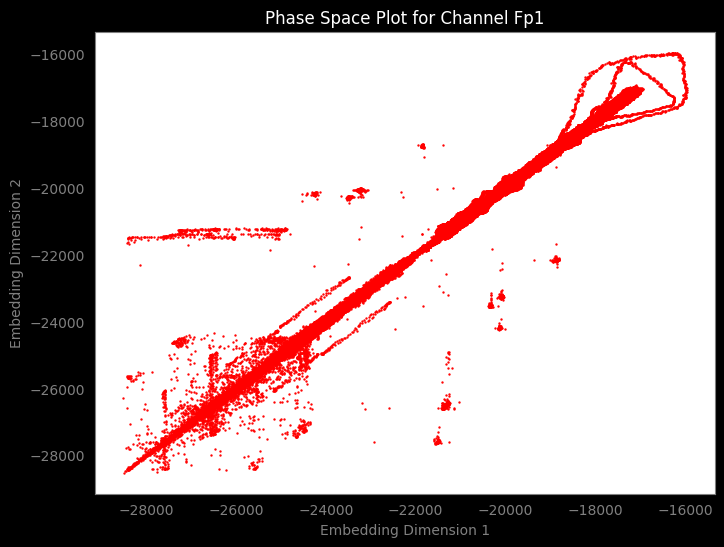

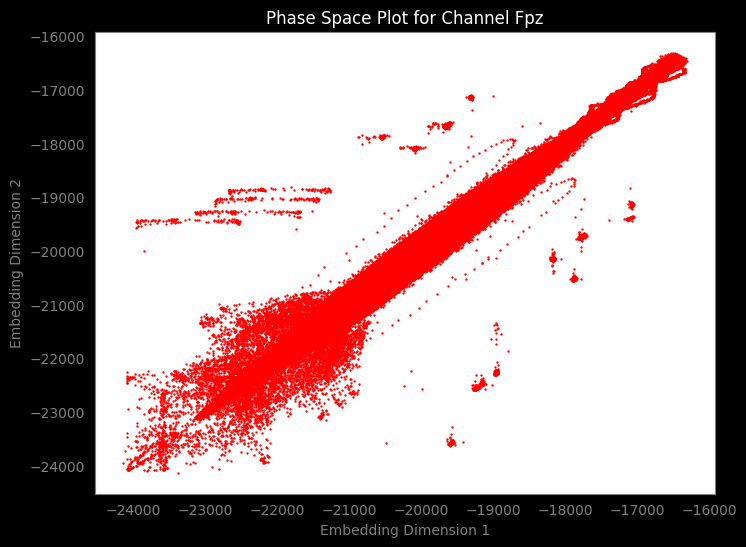

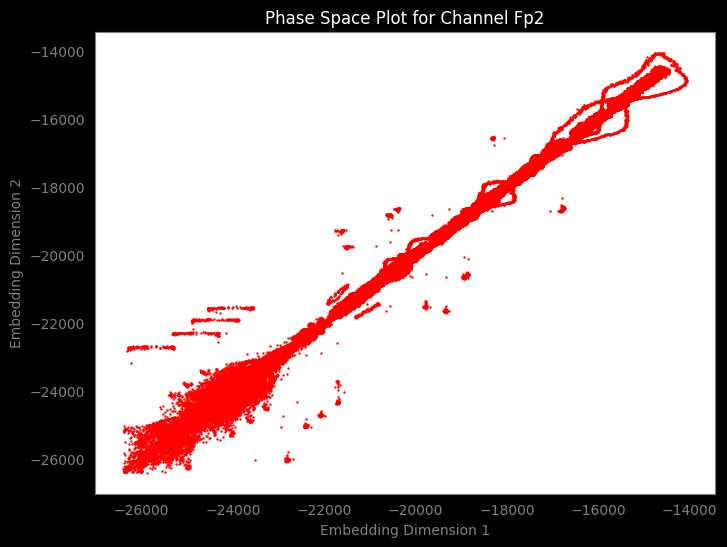

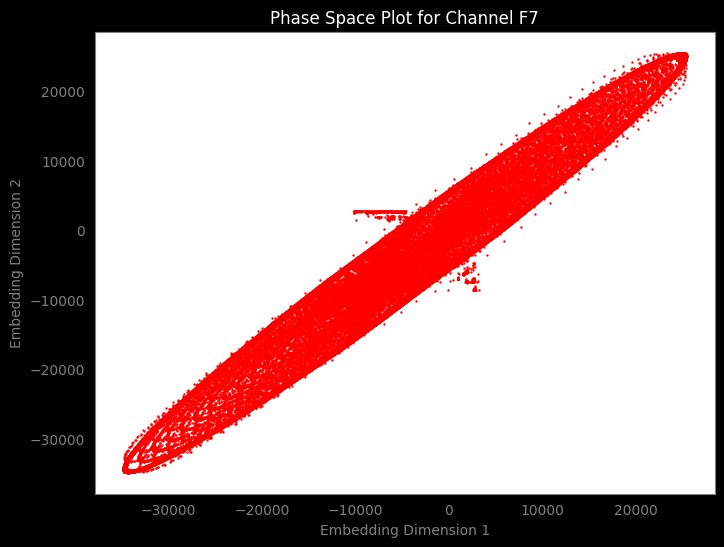

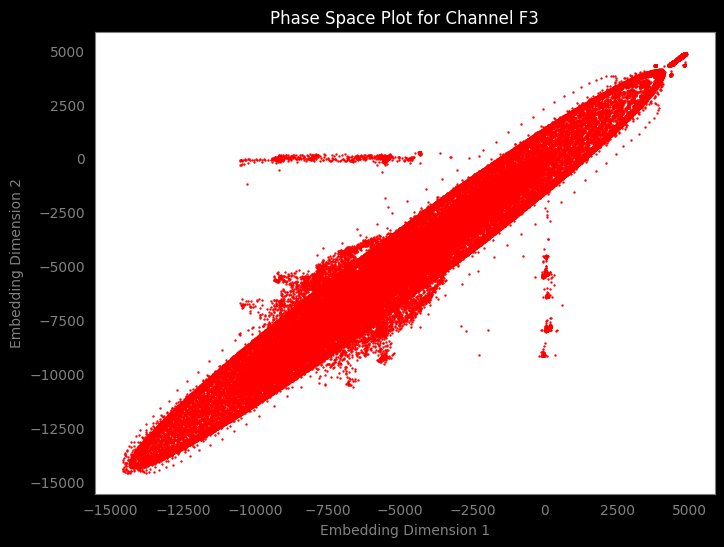

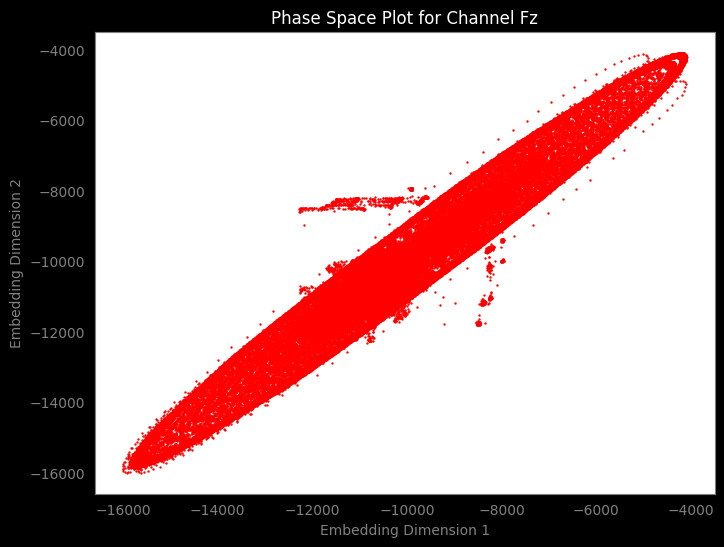

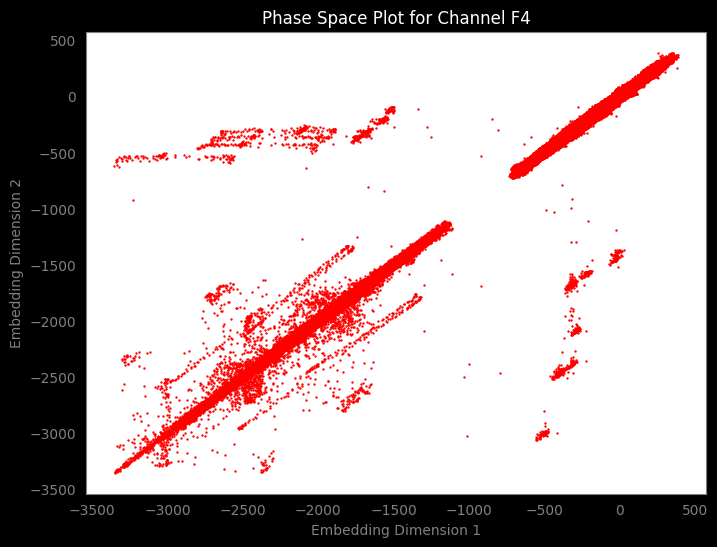

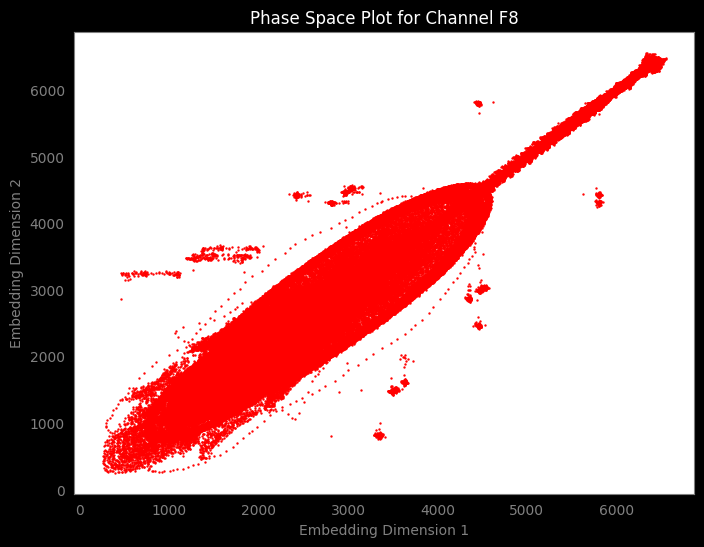

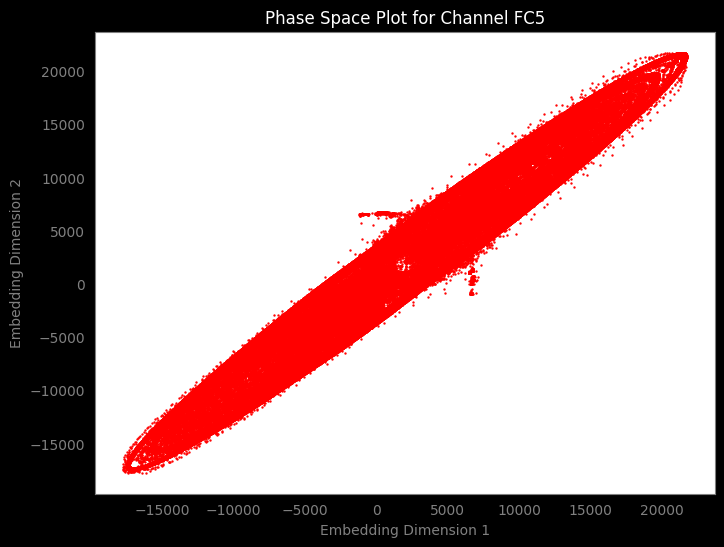

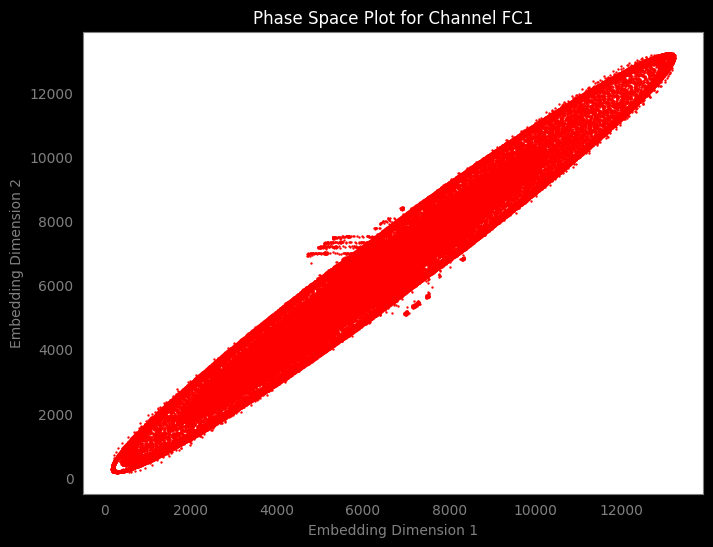

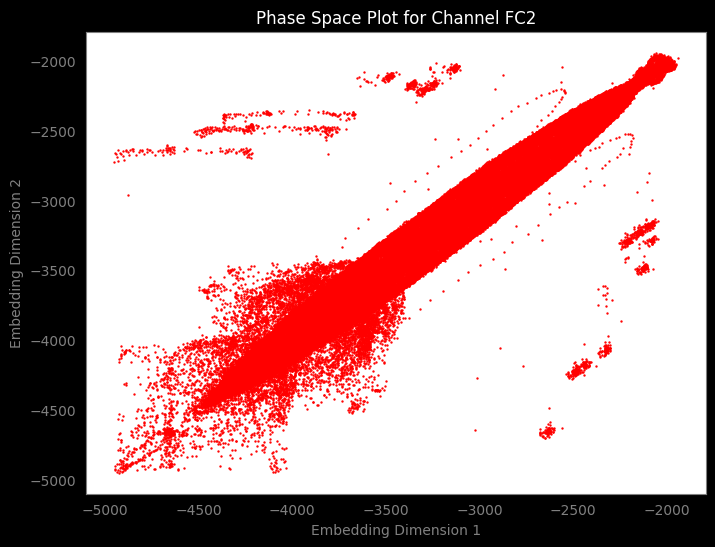

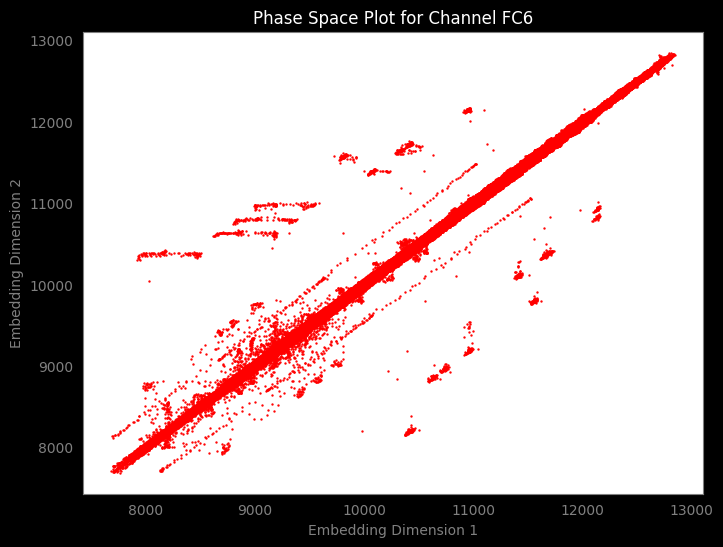

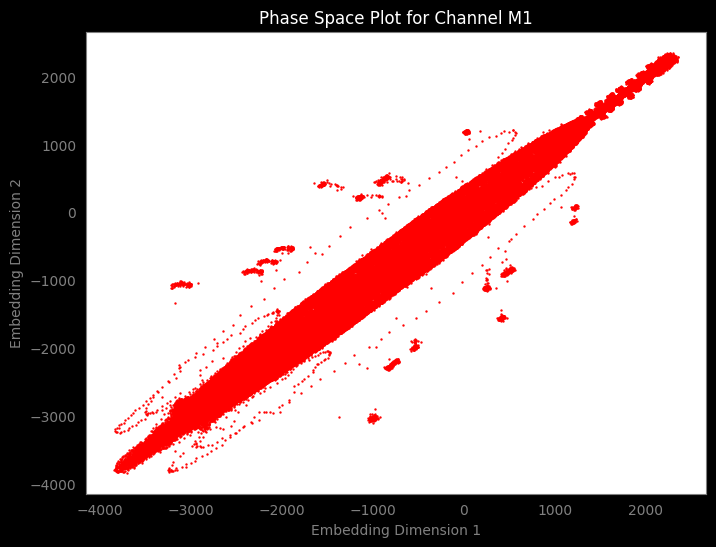

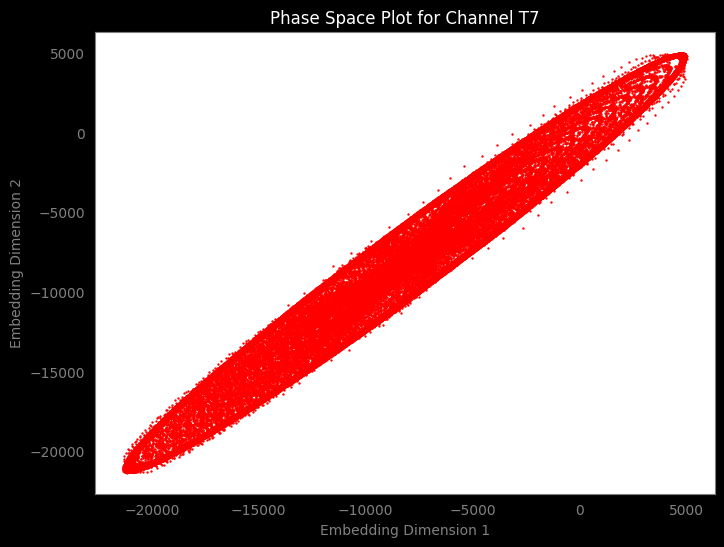

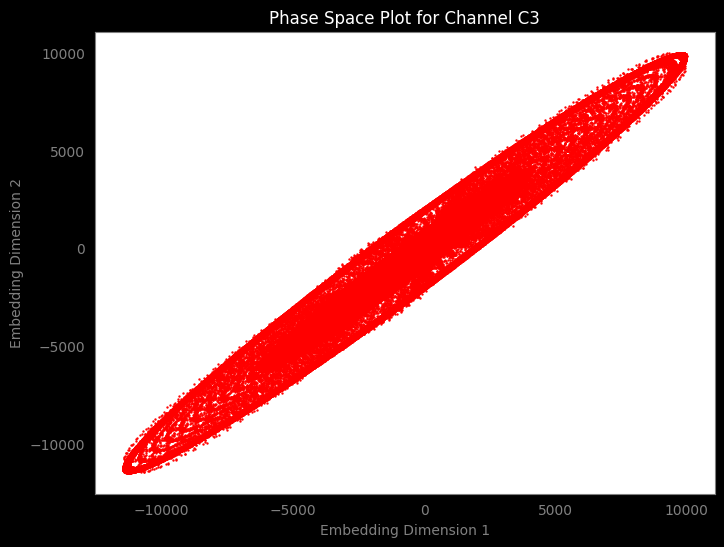

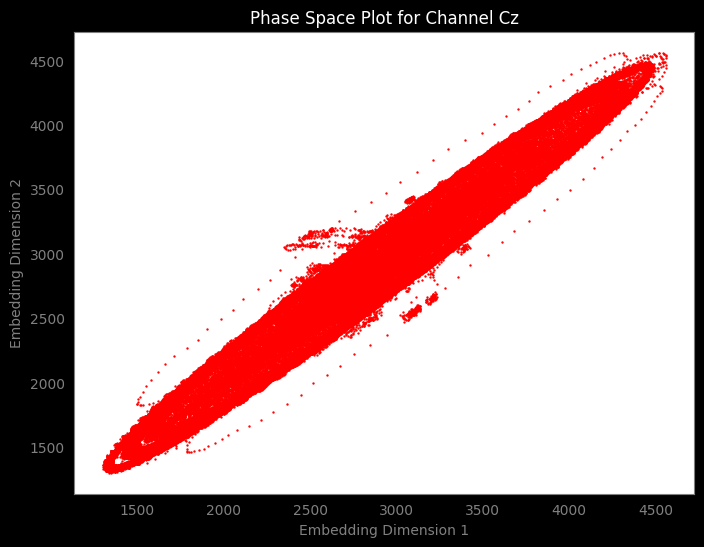

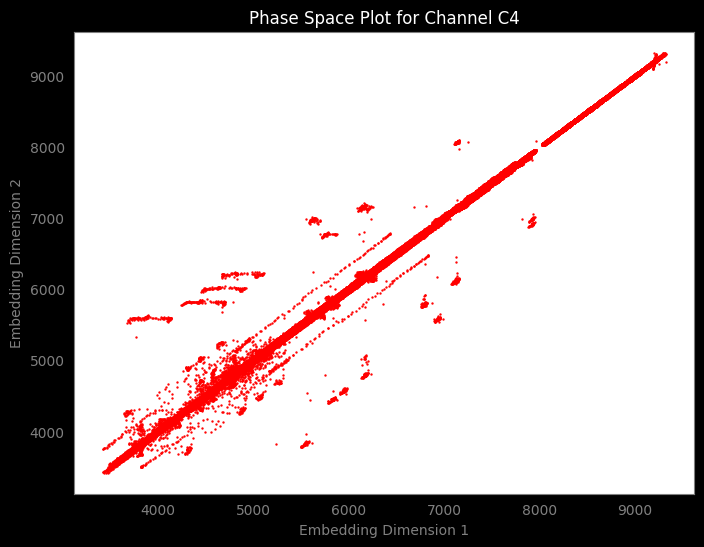

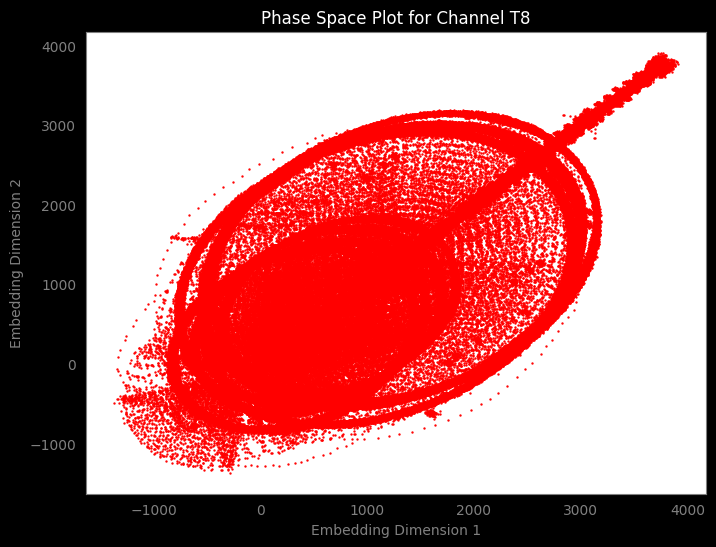

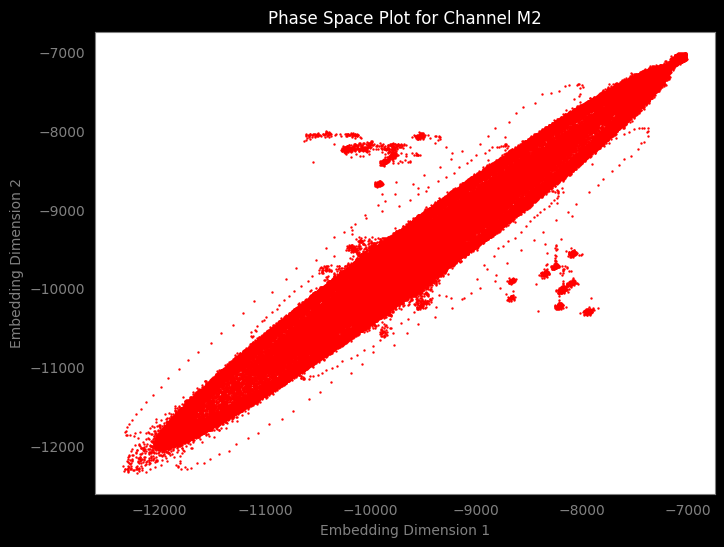

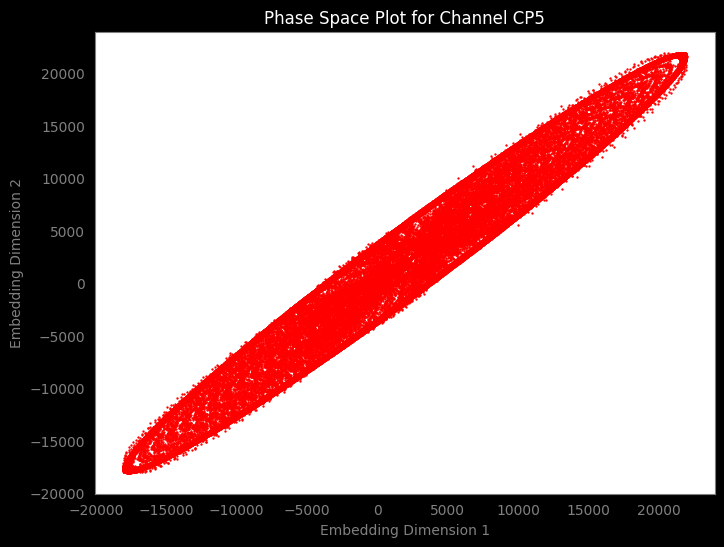

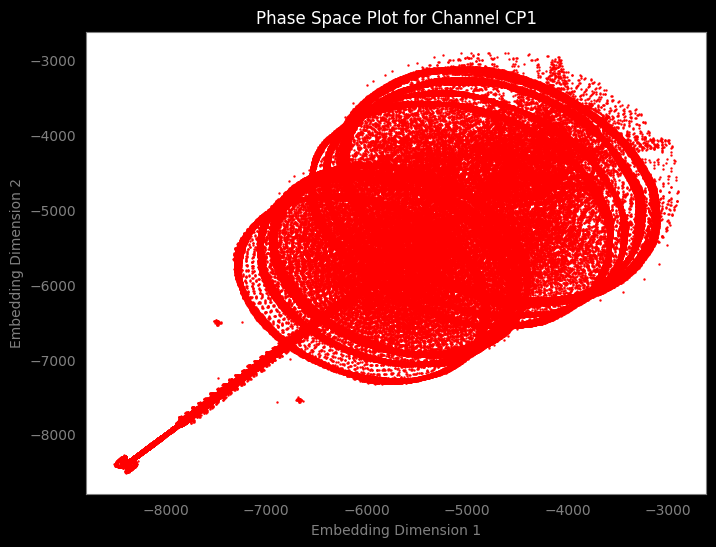

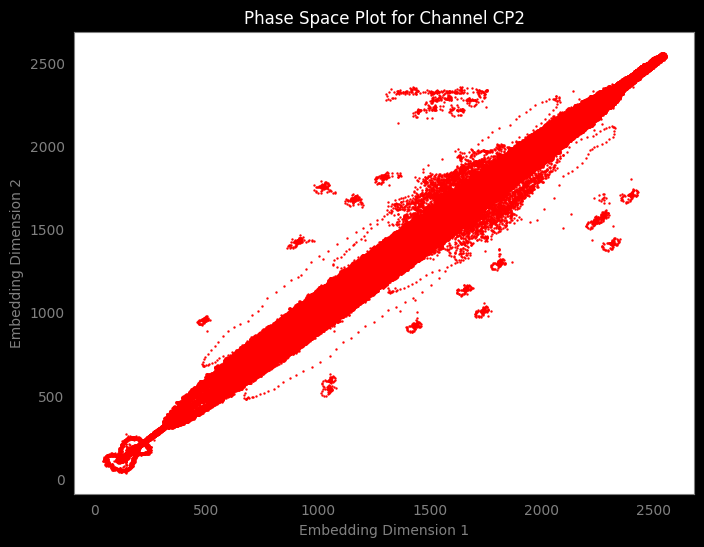

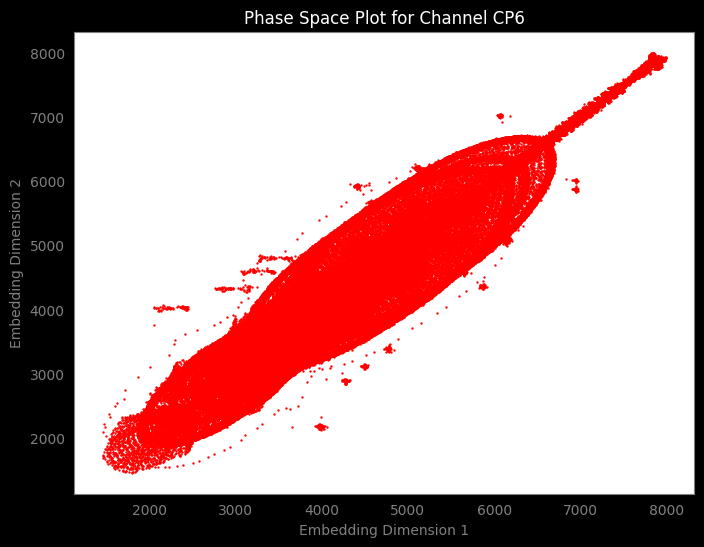

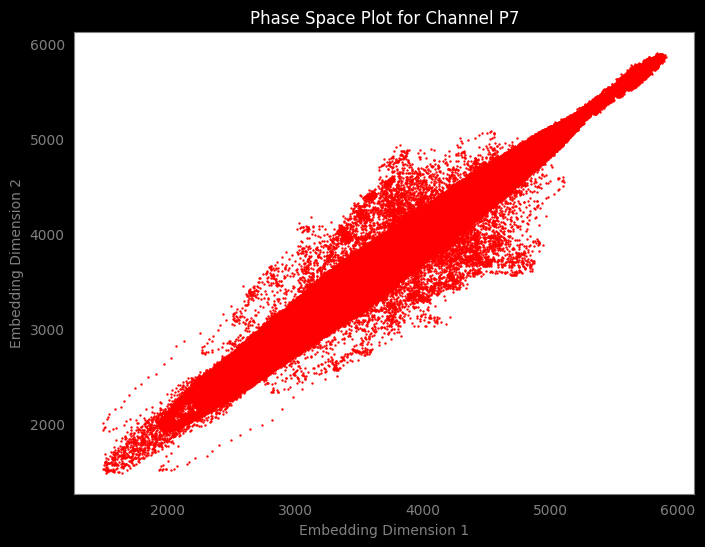

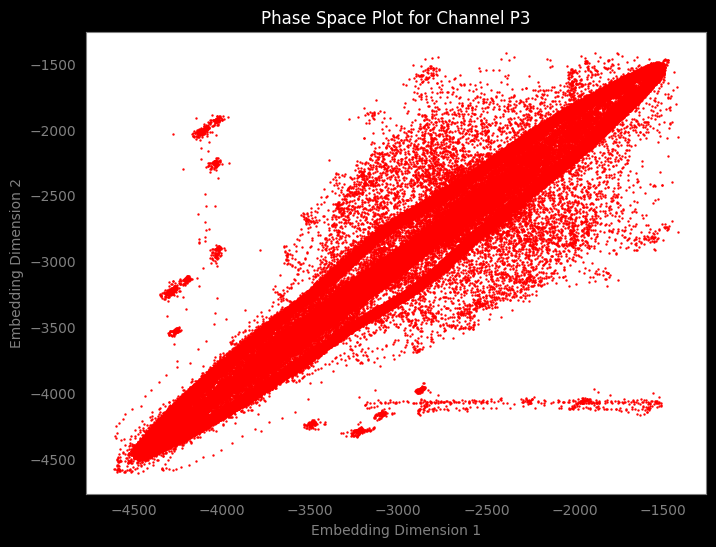

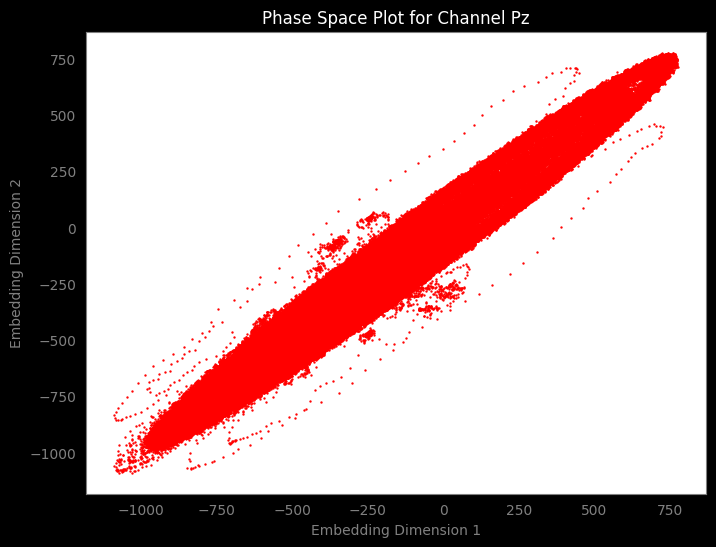

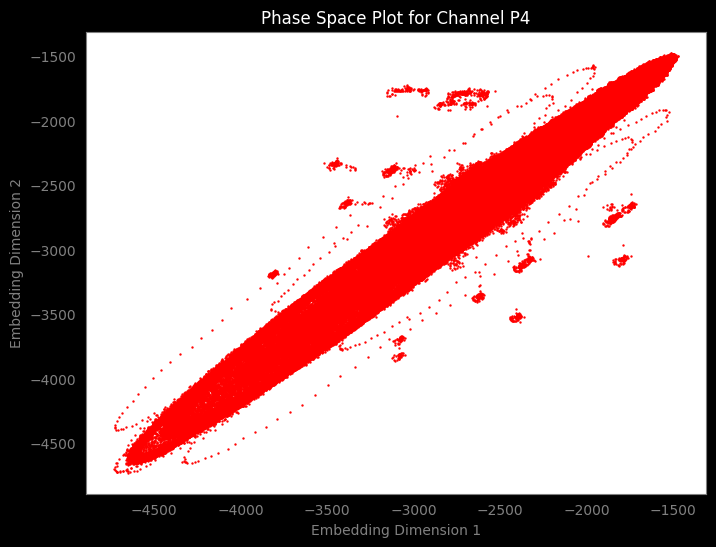

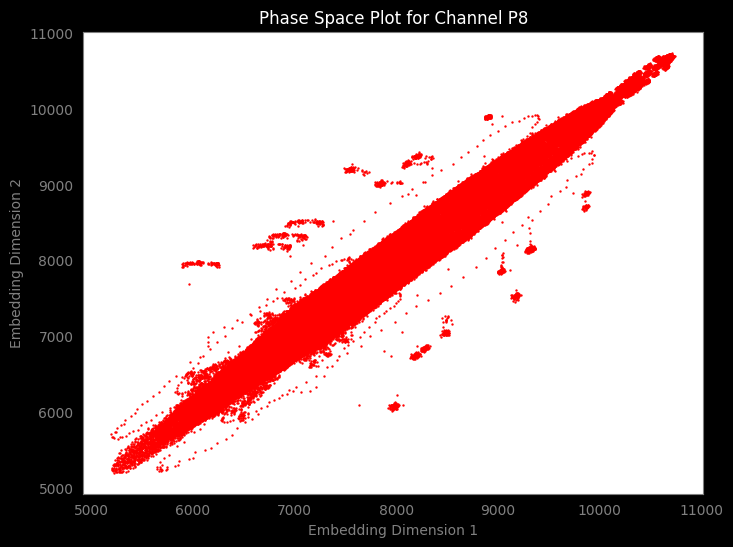

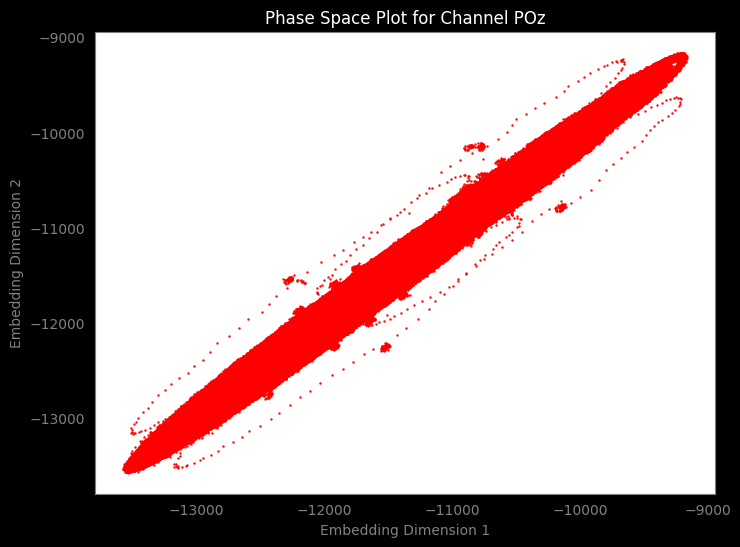

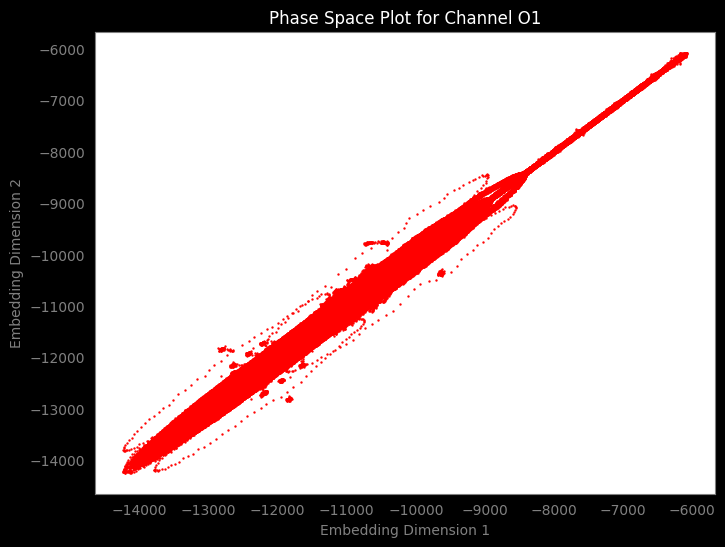

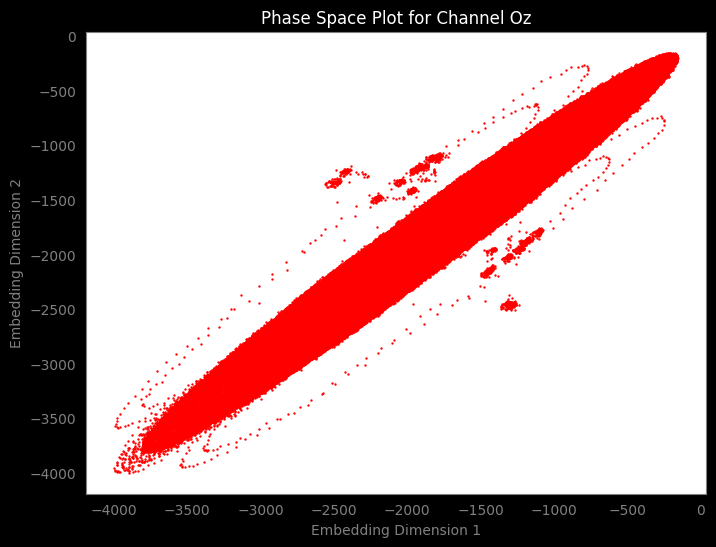

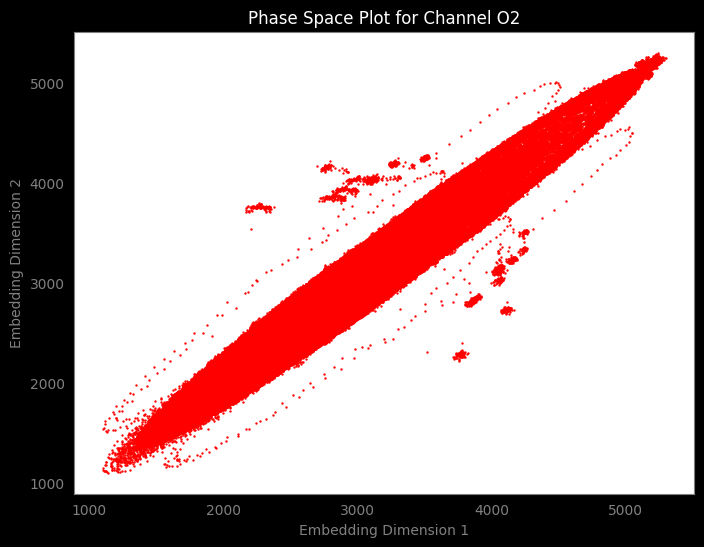

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
import multiprocessing

def mutual_info_worker(args):
    data1, data2 = args
    mine = MINE()
    mine.compute_score(data1, data2)
    return mine.mic()

def determine_delay(data, max_delay=100, subsample_factor=10):
    subsampled_data = data[::subsample_factor]
    with multiprocessing.Pool() as pool:
        args_list = [(subsampled_data[:-i], subsampled_data[i:]) for i in range(1, max_delay+1)]
        mi_values = pool.map(mutual_info_worker, args_list)
    min_index = np.argmin(mi_values)
    return min_index + 1

def delay_embedding(data, emb_dim, delay):
    N = len(data)
    embedded_data = np.zeros((N - (emb_dim - 1) * delay, emb_dim))
    for i in range(N - (emb_dim - 1) * delay):
        embedded_data[i] = [data[i + j * delay] for j in range(emb_dim)]
    return embedded_data

# Load EEG data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Adjust the list to match your data's channels
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']


# Create directory for saving the plots if it doesn't exist
plots_directory = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Space/2dembedding_data/Plots"
if not os.path.exists(plots_directory):
    os.makedirs(plots_directory)

# Loop through each channel
for selected_channel in eeg_channels:
    channel_index = eeg_channels.index(selected_channel)
    channel_data = EEG_data[:, channel_index]
    
    # Determine optimal delay using mutual information with subsampling
    optimal_delay = determine_delay(channel_data, subsample_factor=50)
    
    # Embedding dimension
    emb_dim = 2
    
    # Perform delay embedding
    embedded_channel_data = delay_embedding(channel_data, emb_dim=emb_dim, delay=optimal_delay)
    
    # Save the embedded data
    np.save(f'/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Space/2dembedding_data/2dembedded_{selected_channel}_data.npy', embedded_channel_data)
      
    # Create 2D scatter plot with black background
    plt.figure(figsize=(8, 6), facecolor='black')
    plt.scatter(embedded_channel_data[:, 0], embedded_channel_data[:, 1], color='red', s=0.5)
    plt.title(f'Phase Space Plot for Channel {selected_channel}', color='white')
    plt.xlabel('Embedding Dimension 1', color='grey')
    plt.ylabel('Embedding Dimension 2', color='grey')
    plt.xticks(color='grey')
    plt.yticks(color='grey')
    plt.gca().spines['left'].set_color('grey')
    plt.gca().spines['right'].set_color('grey')
    plt.gca().spines['bottom'].set_color('grey')
    plt.gca().spines['top'].set_color('grey')
    
    # Save the figure to the specified directory
    plt.savefig(os.path.join(plots_directory, f'PhaseSpace_{selected_channel}.png'), facecolor='black', dpi=300)
    plt.close()

# Create a zipfile for the results

In [5]:
import zipfile
import os

# Directory containing the embedded data files
embedded_data_dir = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Space/2dembedding_data'

# List of file paths to the embedded data files
embedded_data_files = [os.path.join(embedded_data_dir, f'2dembedded_{channel}_data.npy') for channel in eeg_channels]

zip_file_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Space/2dembedded_data.zip'

# Create a zipped file containing all embedded data files
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for data_file in embedded_data_files:
        zipf.write(data_file, os.path.basename(data_file))  # Add the file to the zip with its original name

# 3D Phase Space Plot

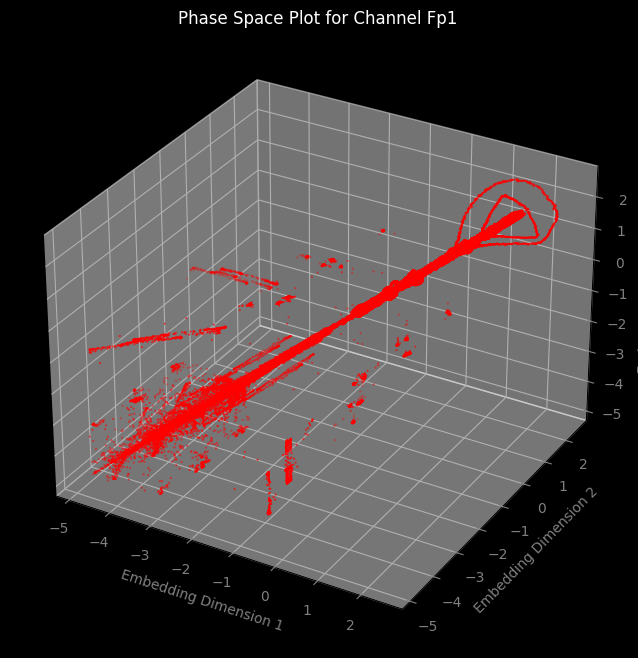

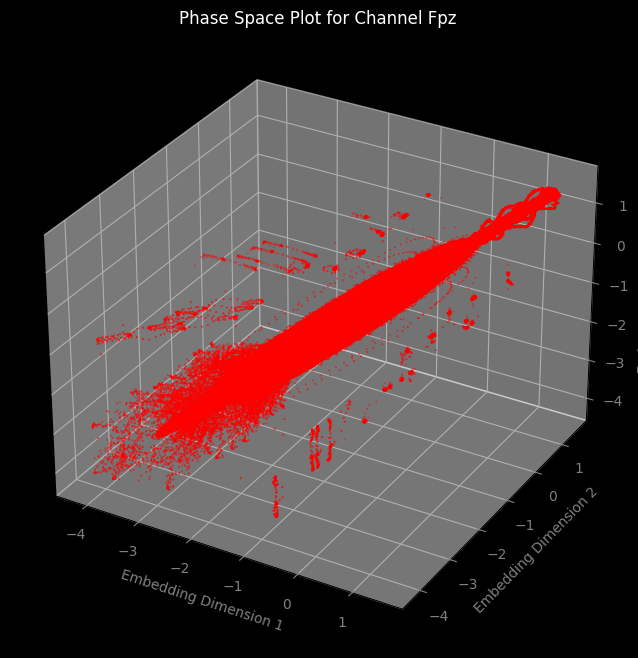

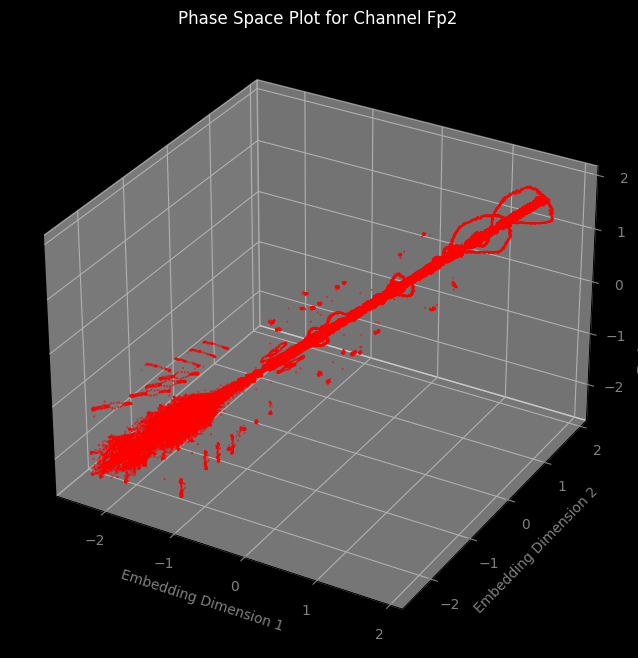

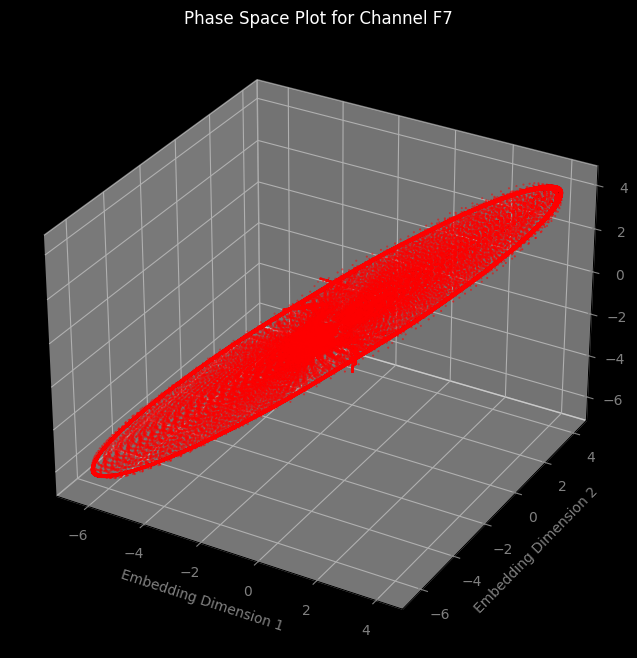

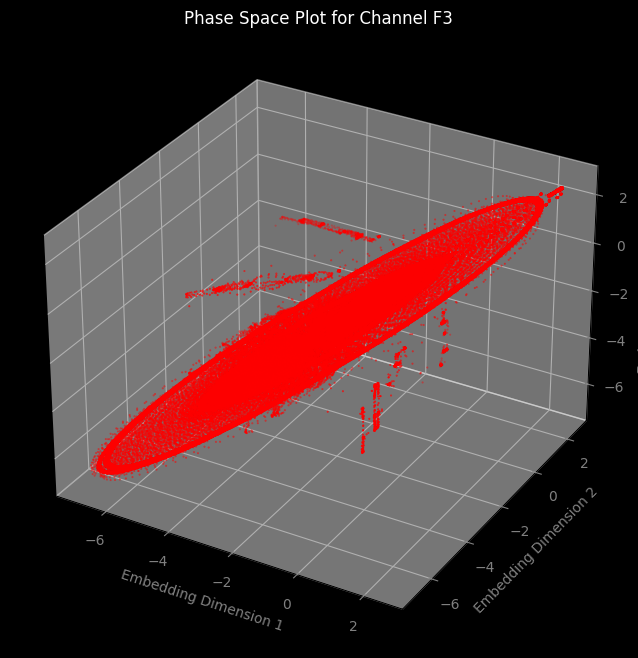

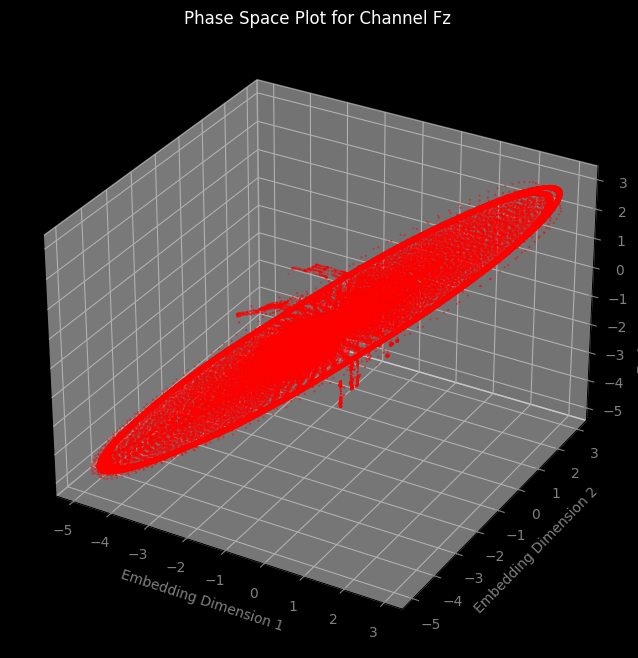

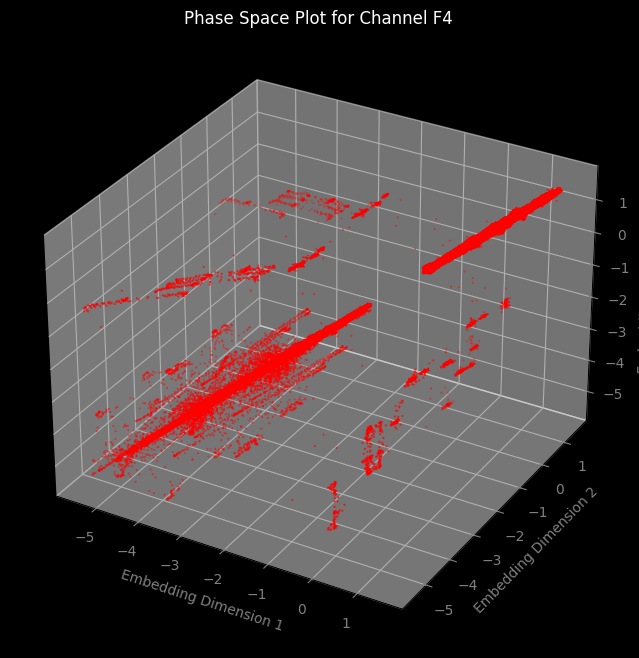

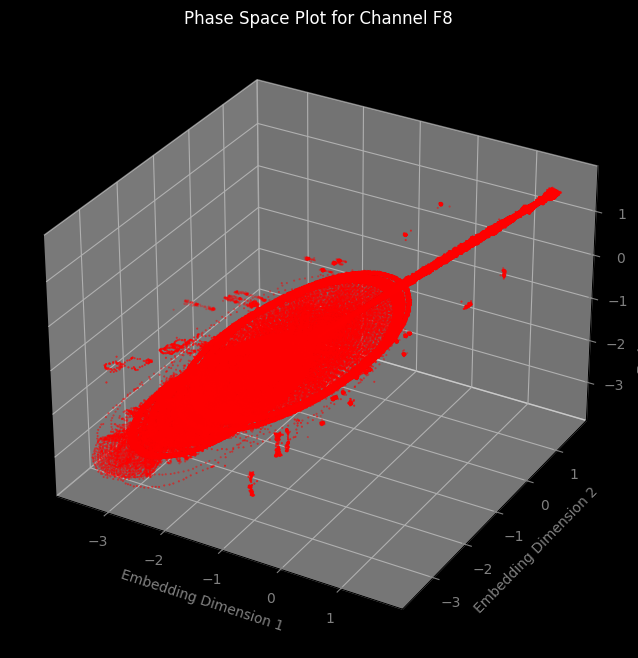

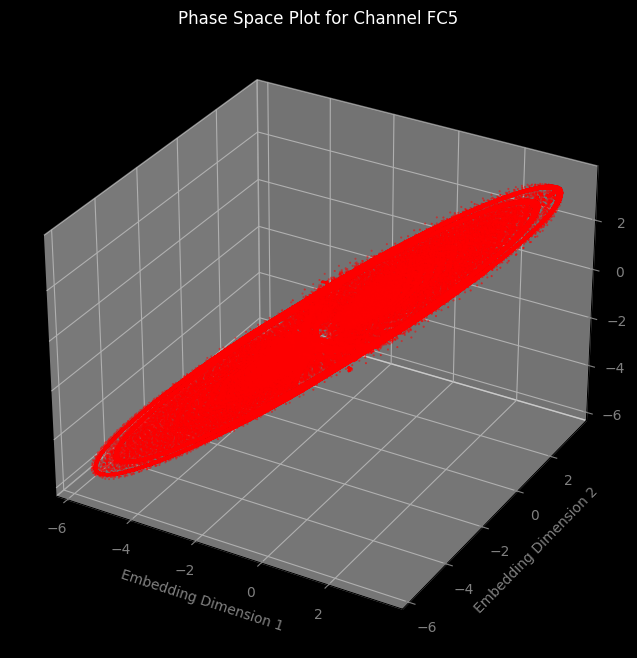

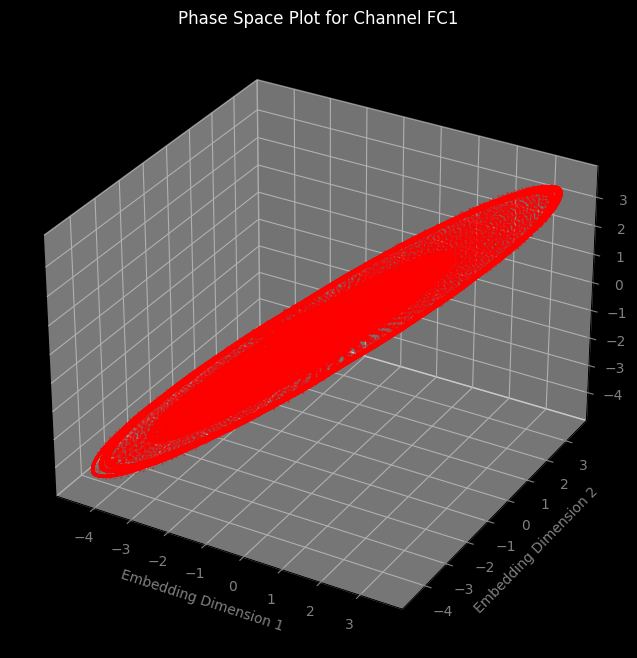

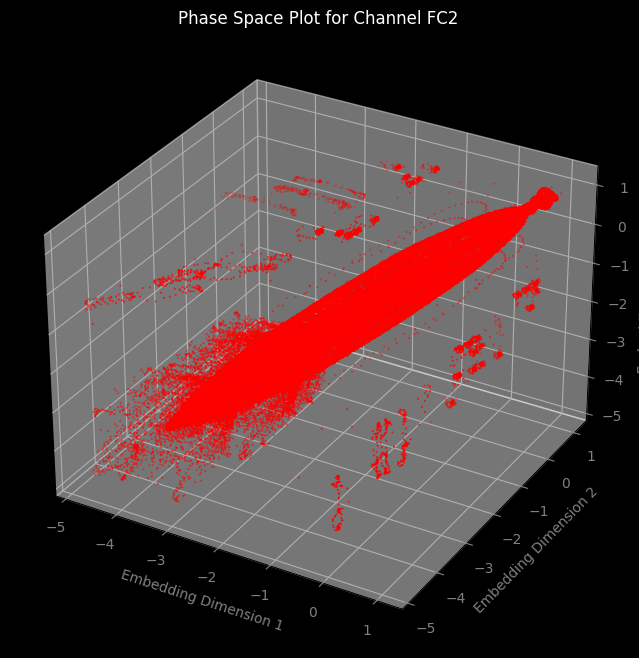

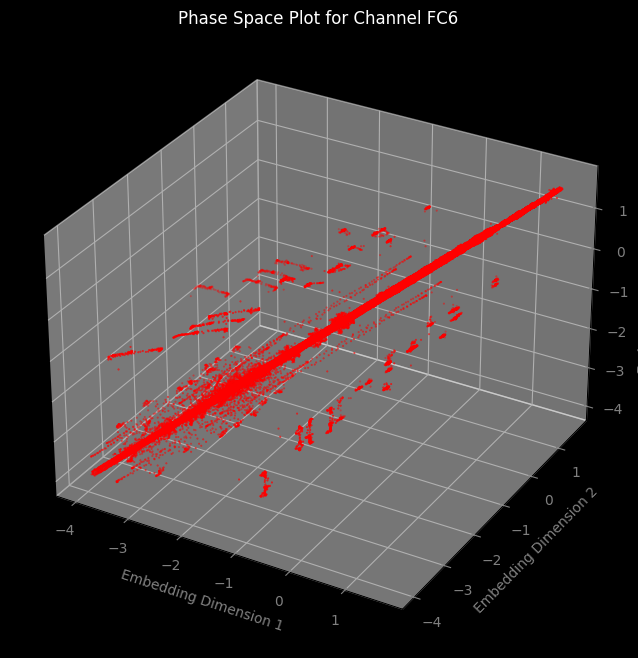

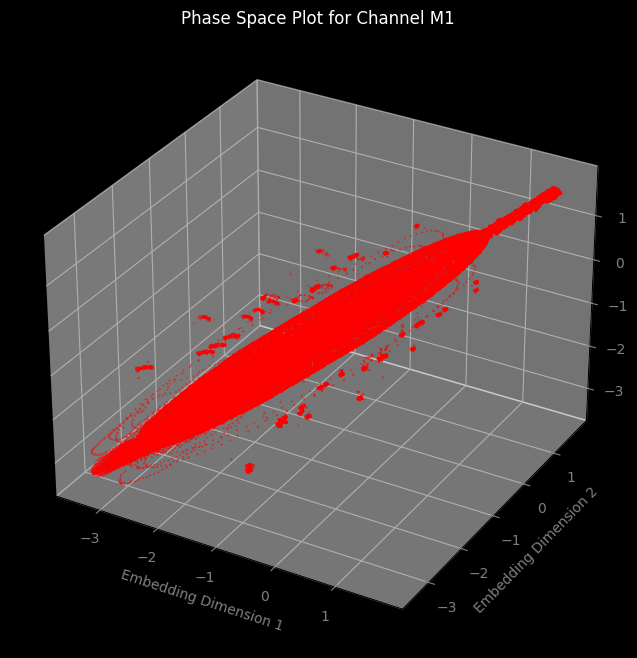

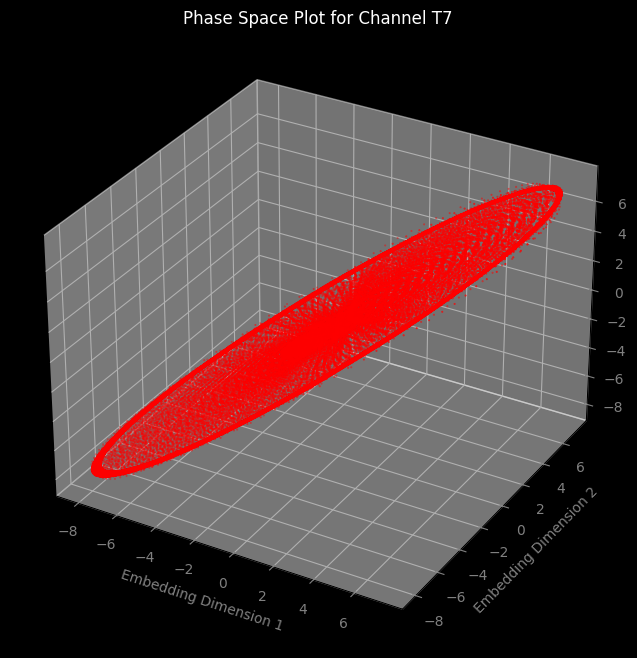

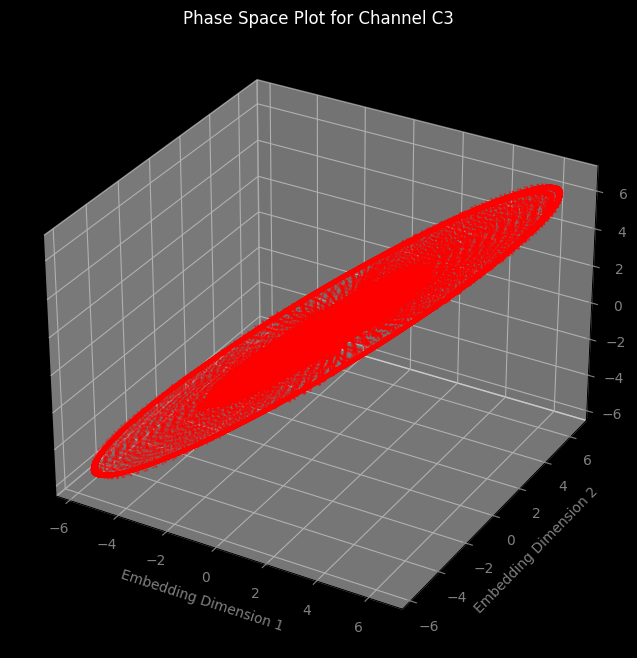

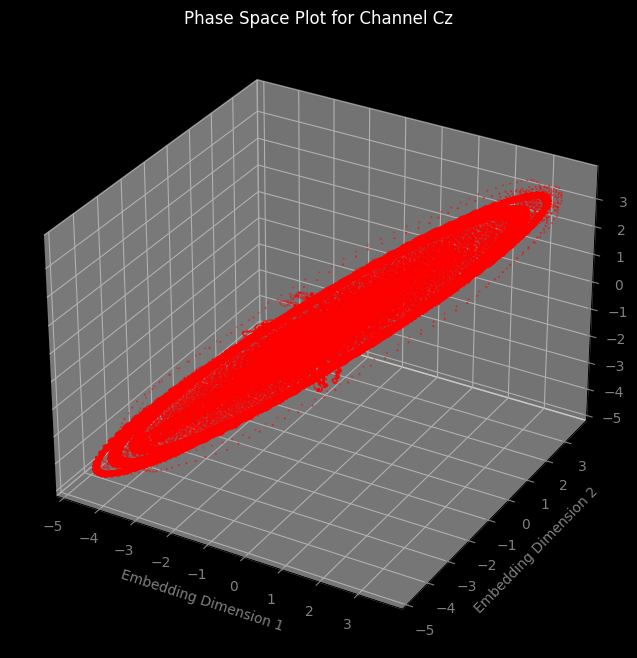

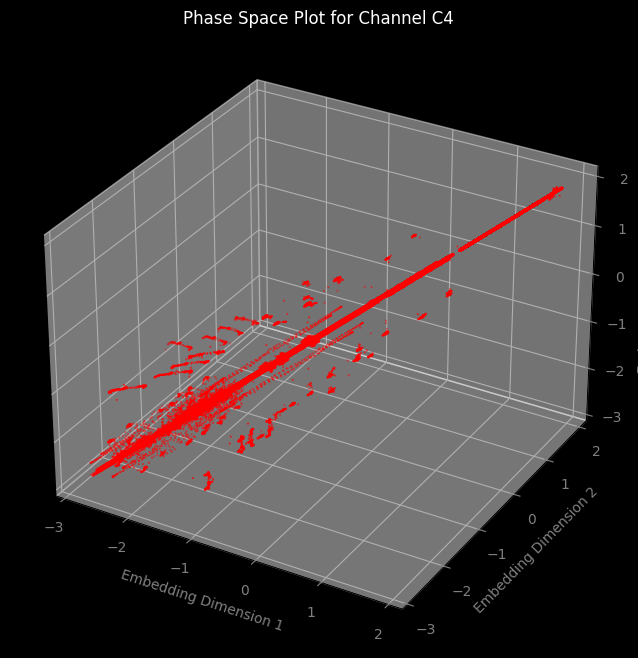

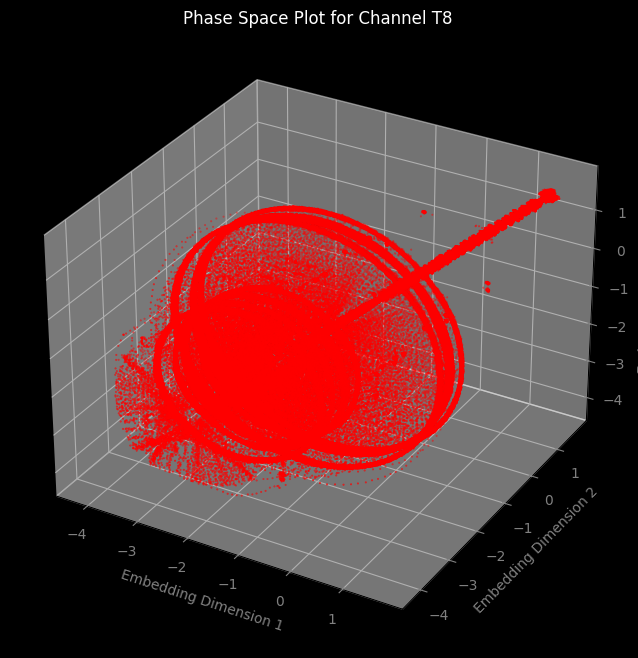

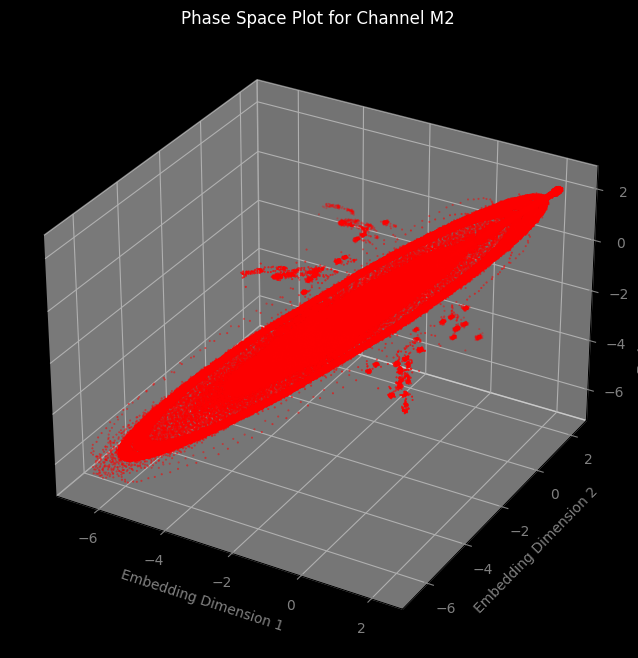

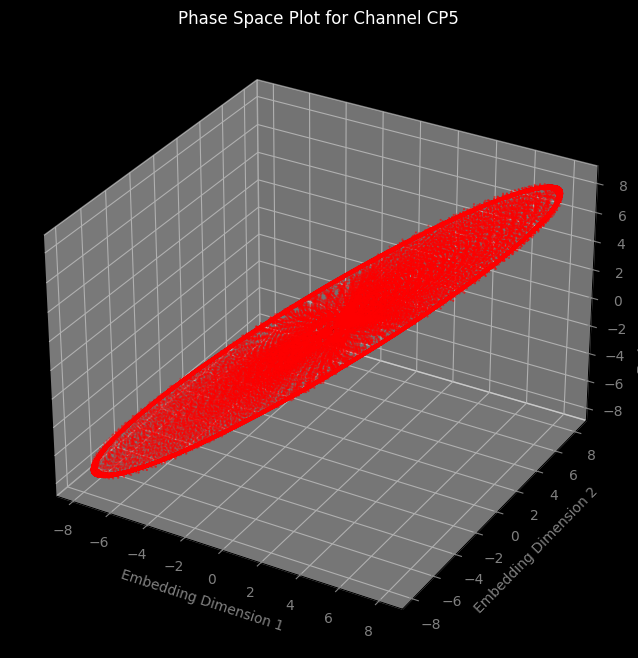

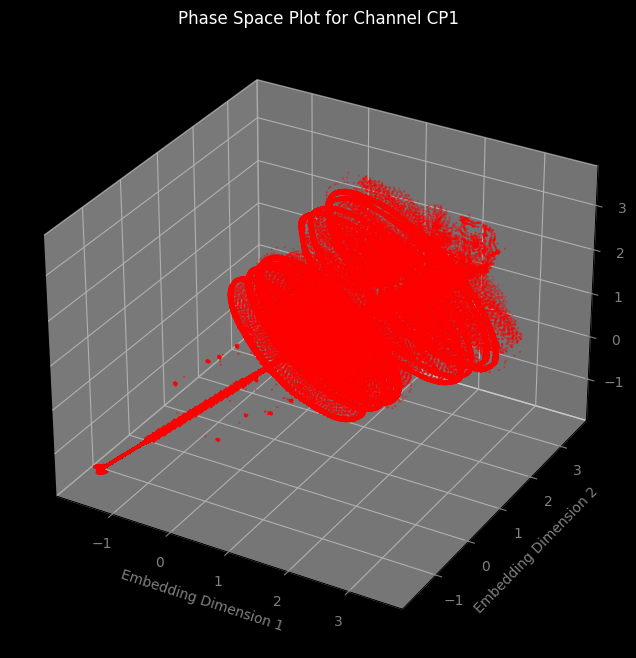

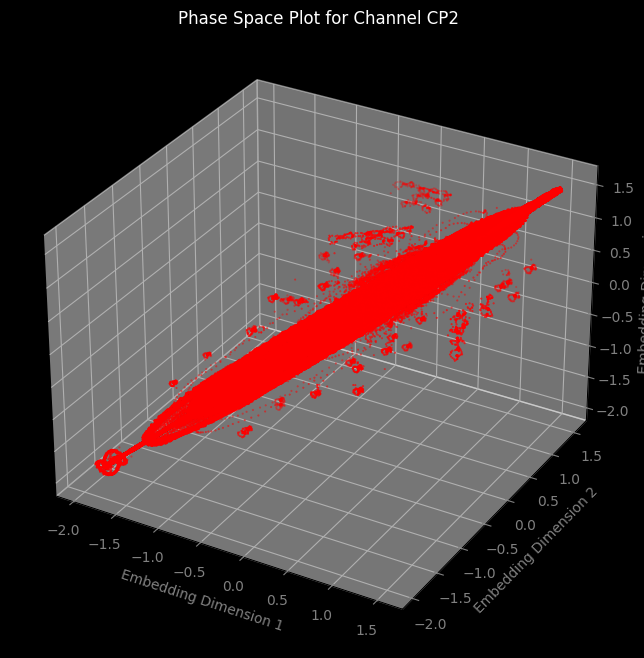

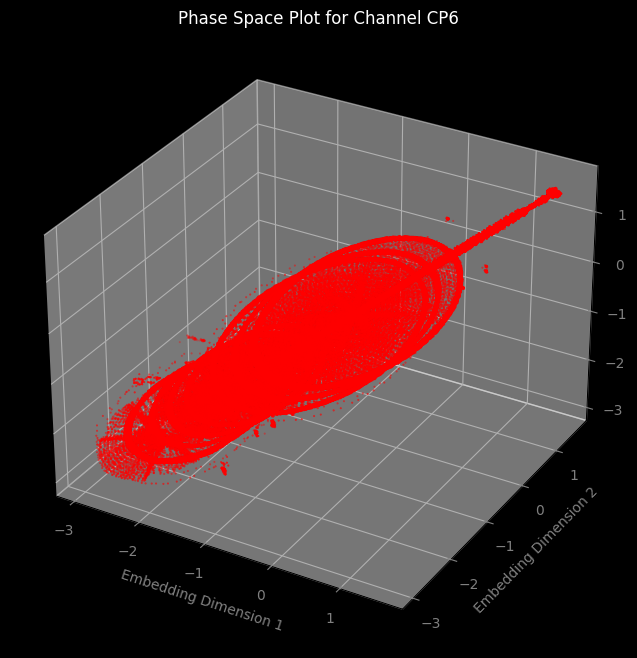

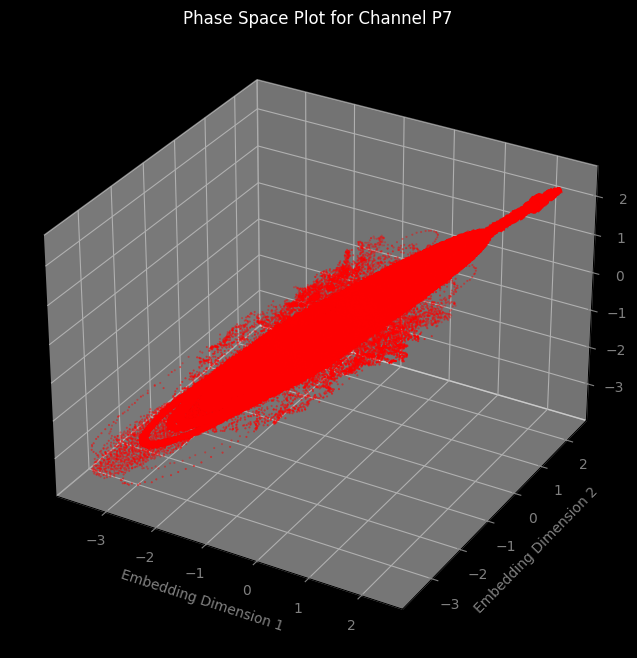

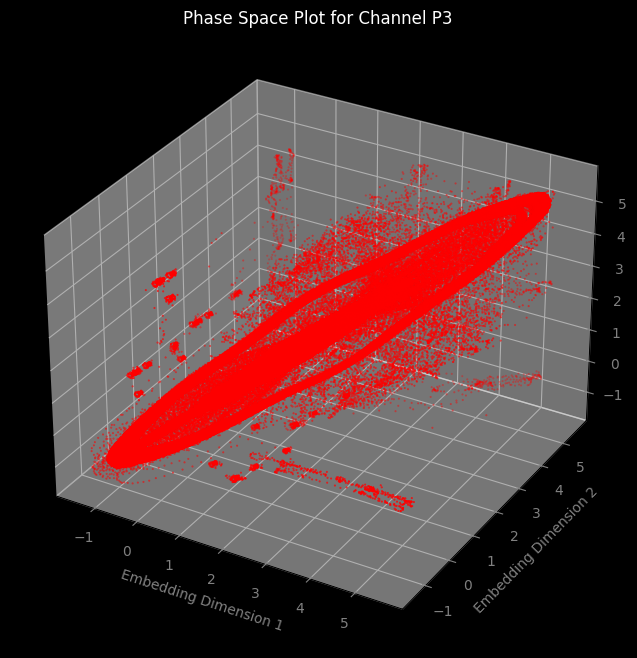

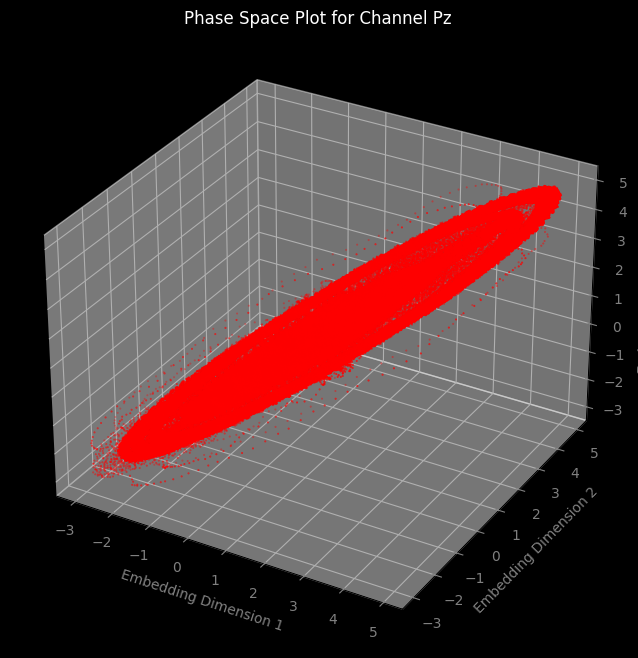

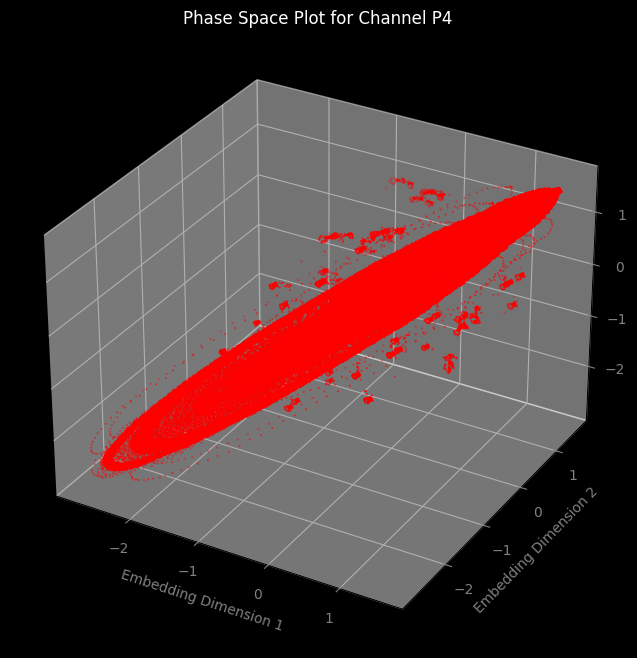

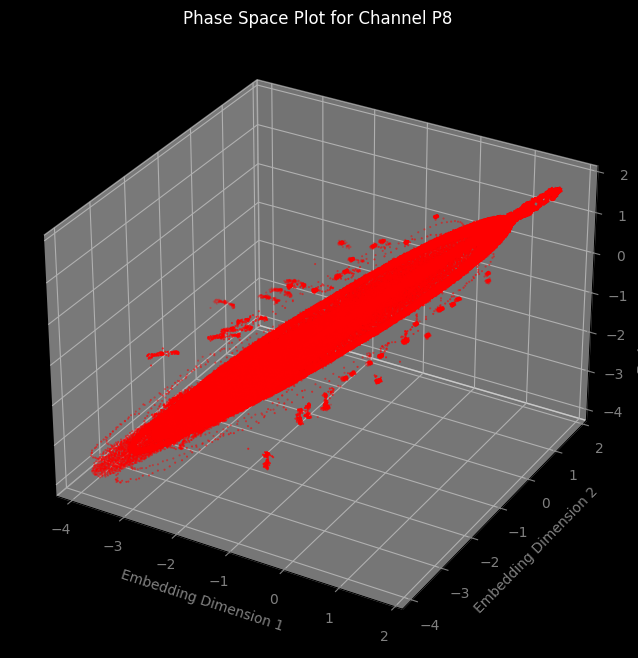

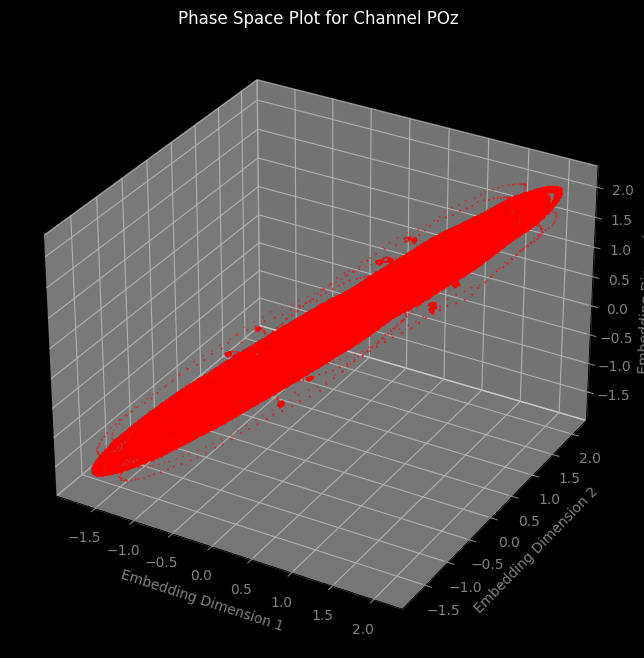

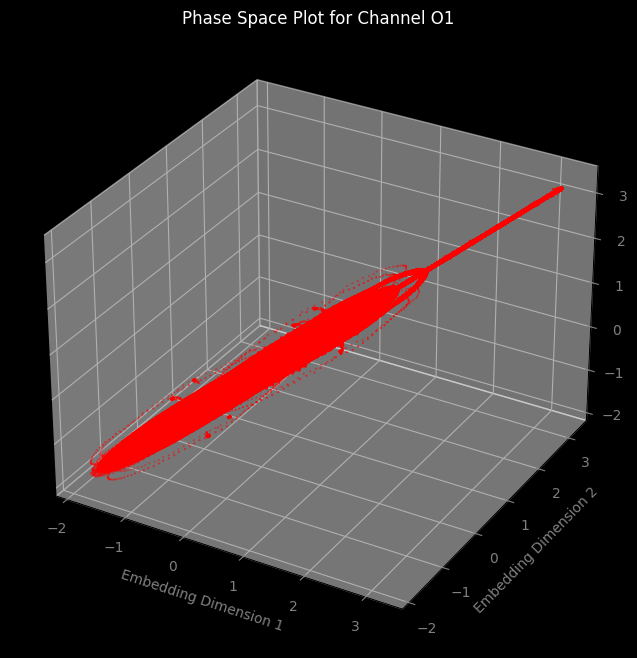

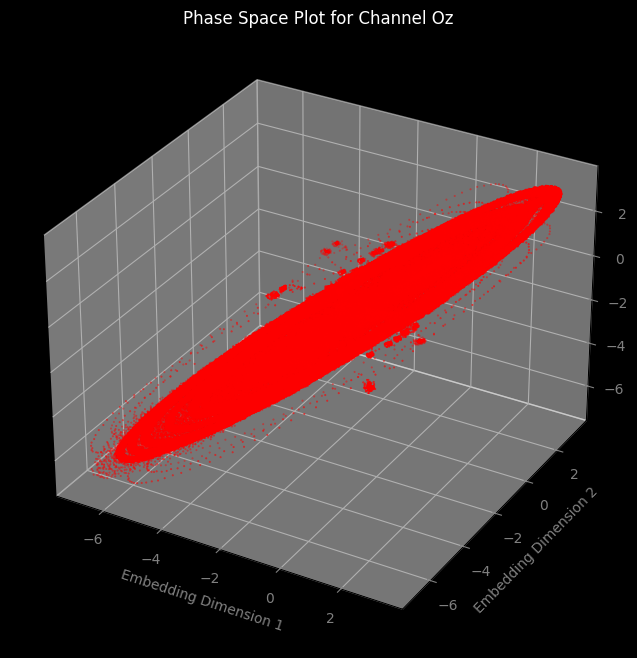

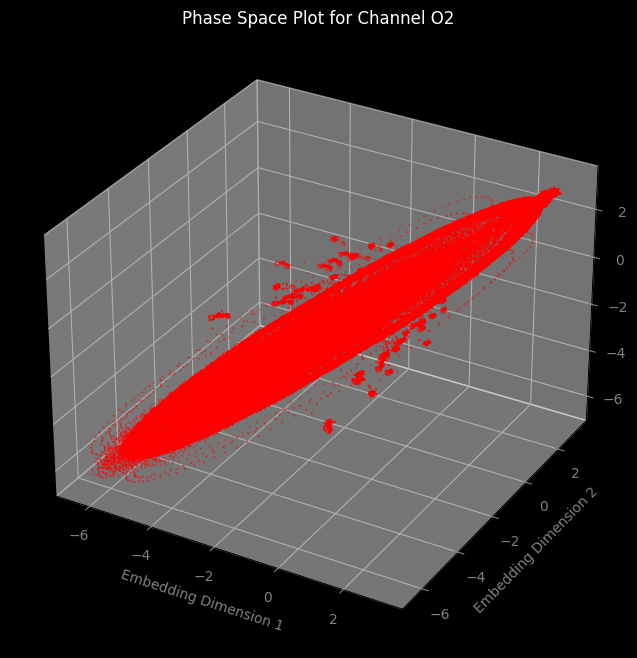

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
import multiprocessing
import zipfile
import os

# Load EEG data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Extract EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                    'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

def mutual_info_worker(args):
    data1, data2 = args
    mine = MINE()
    mine.compute_score(data1, data2)
    return mine.mic()

def determine_delay(data, max_delay=100, subsample_factor=10):
    subsampled_data = data[::subsample_factor]
    with multiprocessing.Pool() as pool:
        args_list = [(subsampled_data[:-i], subsampled_data[i:]) for i in range(1, max_delay+1)]
        mi_values = pool.map(mutual_info_worker, args_list)
    min_index = np.argmin(mi_values)
    return min_index + 1

def delay_embedding(data, emb_dim, delay):
    N = len(data)
    embedded_data = np.zeros((N - (emb_dim - 1) * delay, emb_dim))
    for i in range(N - (emb_dim - 1) * delay):
        embedded_data[i] = [data[i + j * delay] for j in range(emb_dim)]
    return embedded_data

embedded_data_dict = {}

# Load EEG data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Assuming EEG_data is of shape (num_samples, num_channels)
for channel_index, channel_name in enumerate(eeg_channels):
    channel_data = EEG_data[:, channel_index]
    
    # Normalize the data
    channel_data = (channel_data - np.mean(channel_data)) / np.std(channel_data)
    
    # Determine optimal delay using mutual information with subsampling
    optimal_delay = determine_delay(channel_data, subsample_factor=50)  # Adjust subsample_factor as needed

    # Embedding dimension
    emb_dim = 3

    # Perform delay embedding
    embedded_channel_data = delay_embedding(channel_data, emb_dim=emb_dim, delay=optimal_delay)
    embedded_data_dict[channel_name] = embedded_channel_data  # store the embedded data in the dictionary

    # Create 3D scatter plot with black background
    fig = plt.figure(figsize=(10,8), facecolor='black')
    ax = fig.add_subplot(111, projection='3d', frame_on=False)
    ax.scatter(embedded_channel_data[:, 0], embedded_channel_data[:, 1], embedded_channel_data[:, 2], color='red', s=0.2)
    ax.set_facecolor('black')
    ax.set_title(f'Phase Space Plot for Channel {channel_name}', color='white')
    ax.set_xlabel('Embedding Dimension 1', color='grey')
    ax.set_ylabel('Embedding Dimension 2', color='grey')
    ax.set_zlabel('Embedding Dimension 3', color='grey')
    ax.spines['left'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.xaxis.label.set_color('grey')
    ax.yaxis.label.set_color('grey')
    ax.zaxis.label.set_color('grey')
    ax.tick_params(axis='both', colors='grey')
    plt.show()

# Path to save the numpy files before zipping
temp_save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Space/3dembedding_data/temp'

# Check if the temp directory exists. If not, create it
if not os.path.exists(temp_save_path):
    os.makedirs(temp_save_path)

# Save the embedded data for each channel as separate numpy files
for channel_name, data in embedded_data_dict.items():
    file_path = os.path.join(temp_save_path, f'3dembedded_{channel_name}.npy')
    np.save(file_path, data)

# Create a zipped file containing all embedded data files
with zipfile.ZipFile('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Phase Space/3dembedded_data.zip', 'w') as zipf:
    for channel_name in eeg_channels:
        data_file_name = f'3dembedded_{channel_name}.npy'
        file_path = os.path.join(temp_save_path, data_file_name)
        zipf.write(file_path, arcname=data_file_name)
